<a href="https://colab.research.google.com/github/sumeethkumar12/dl/blob/main/ml4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-b5b033051d60>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y)


Epoch 1/10
157/157 [==============================] - 2s 7ms/step - loss: 0.2270 - val_loss: 0.1448
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 0.1190 - val_loss: 0.1065
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0932 - val_loss: 0.0889
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0842 - val_loss: 0.0832
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0782 - val_loss: 0.0784
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0748 - val_loss: 0.0769
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0726 - val_loss: 0.0750
Epoch 8/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0721 - val_loss: 0.0728
Epoch 9/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0707 - val_loss: 0.0719
Epoch 10/10
157/157 [==============================] - 1s 7ms/step - loss: 0.0692 - val_loss: 0.0721

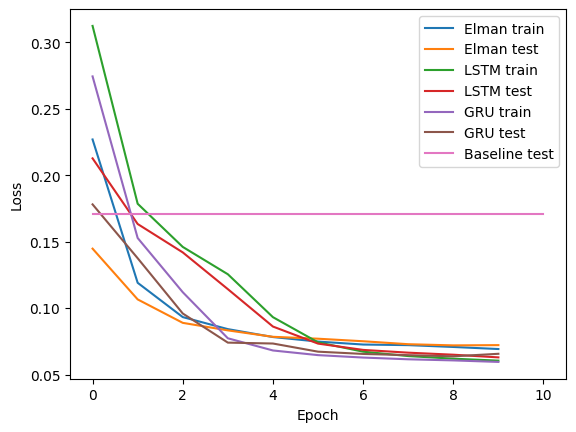

In [ ]:
# ai21btech11008 sumeethkumar.
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN

 # 1.  Generate dataset 
def generate_dataset(n_samples):
    X = []
    y = []
    for i in range(n_samples):
        n = np.random.randint(5, 11)
        x = np.random.rand(n, 2)
        mask = np.zeros(n)
        idx = np.random.choice(n, 2, replace=False)
        mask[idx] = 1
        y.append(np.sum(x[:, 0] * mask))
        x[:, 1] = mask
        X.append(x)
    return np.array(X), np.array(y)

X_train, y_train = generate_dataset(5000)
X_test, y_test = generate_dataset(1000)

# 2.Pad sequences with zeros  chan
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', dtype=np.float32)
y_train = tf.keras.preprocessing.sequence.pad_sequences(y_train[:, np.newaxis], padding='post', dtype=np.float32)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', dtype=np.float32)
y_test = tf.keras.preprocessing.sequence.pad_sequences(y_test[:, np.newaxis], padding='post', dtype=np.float32)

# 3.Convert the datasets to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# 4.Define the models
models = [    ('Elman', Sequential([        SimpleRNN(64, input_shape=(None, 2), activation='tanh', return_sequences=True),        Dense(1)    ])),
    ('LSTM', Sequential([
        LSTM(64, input_shape=(None, 2), return_sequences=True),
        Dense(1)
    ])),
    ('GRU', Sequential([
        GRU(64, input_shape=(None, 2), return_sequences=True),
        Dense(1)
    ]))
]


# 5.Train the models
histories = {}
for name, model in models:
    model.compile(optimizer='adam', loss='mse')
    histories[name] = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

for name, model in models:
    loss = model.evaluate(X_test, y_test)
    print(f'{name}: test loss = {loss:.4f}')


# Baseline model
baseline_model.compile(optimizer='adam', loss='mse')
baseline_model.fit(np.zeros_like(y_train), y_train, epochs=10, validation_data=(np.zeros_like(y_test), y_test))
baseline_loss = baseline_model.evaluate(np.zeros_like(y_test), y_test)
print(f'Baseline: test loss = {baseline_loss:.4f}')


# Plot 
import matplotlib.pyplot as plt

for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} train')
    plt.plot(history.history['val_loss'], label=f'{name} test')

plt.plot([0, len(history.history['loss'])], [baseline_loss, baseline_loss], label='Baseline test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
